# Part I - Fordgobike Dataset
## by _Oladimeji Nurudeen_

## Introduction
> This dataset is for _Fordgobike bike sharing system_. It contains information about 174952 trips for the month and year, February, 2019. Information in the dataset include trip durations and time, users information, start and end stations.


## Preliminary Wrangling


In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# set style as darkgrid with seaborn
sb.set_style(style='darkgrid')
# set plots to be embedded inline
%matplotlib inline

> I will load in my dataset and describe its properties through the questions below. I will try and motivate my exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe. Print statistics
fordgobike = pd.read_csv('fordgobike.csv')
fordgobike.shape

(183412, 16)

In [3]:
# high-level overview of data shape and composition
print(fordgobike.shape)
print(fordgobike.dtypes)
print(fordgobike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

For cleaning, analysis, and visualization, I will focus on the start time -Since we can deduce end time from the trip durations. Moreover, end time is not as equally as important as start time for this analysis.

In [4]:
# convert the start_time column from object datatype to datetime datatype
fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])

# extract year, month, day of week and hour from start_time column
fordgobike['year'] = fordgobike['start_time'].dt.year
fordgobike['month'] = fordgobike['start_time'].dt.month
fordgobike['day_of_week'] = fordgobike['start_time'].dt.day_name()
fordgobike['hour'] = fordgobike['start_time'].dt.hour

fordgobike.shape

(183412, 20)

In [5]:
# create feature:day part from the hour column
time_intervals = [0,4,11,16,20,23]
time_labels=['Midnight', 'Morning', 'Afternoon', 'Evening', 'Night']
# use a for-loop to iterate over the hour column 
for hour in ['hour']:
    fordgobike[f'day_part']=pd.cut(fordgobike[hour], bins=time_intervals, labels=time_labels, include_lowest=True)
    
# test                                        
fordgobike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day_of_week,hour,day_part
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2019,2,Thursday,17,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,2019,2,Thursday,18,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2019,2,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2019,2,Thursday,17,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2019,2,Thursday,23,Night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,2019,2,Thursday,23,Night
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983.0,Female,No,2019,2,Thursday,23,Night
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989.0,Male,No,2019,2,Thursday,23,Night
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988.0,Other,No,2019,2,Thursday,23,Night
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992.0,Male,No,2019,2,Thursday,23,Night


In [6]:
# convert day part, and day of week into ordered categorical types
ordinal_var_dict = {'day_part': ['Midnight', 'Morning', 'Afternoon', 'Evening', 'Night'],
                    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

# use a for-loop to iterate over the dictionary:ordinal_var_dict
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgobike[var] = fordgobike[var].astype(ordered_var)

In [7]:
# descriptive statistics for numeric variables
print(fordgobike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

February is the only month in the start_time column, hence, it won't be useful for further analysis. Likewise, 2019 is the only year in the start_time column, hence, it won't be useful for further analysis

I will make a copy of the dataframe and perform some cleaning

In [8]:
fordgobike_clean = fordgobike.copy()

In [9]:
# Drop null values in the dataset
fordgobike_clean.dropna(inplace=True)

# Test
fordgobike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
year                       0
month                      0
day_of_week                0
hour                       0
day_part                   0
dtype: int64

In [10]:
# Use lambda expression to create age column from member_birth_year column by subtracting member_birth_year from 2019
# 2019 is the year of rides
# Convert age datatype to integer using int function in the lambda expression
fordgobike_clean['age'] = fordgobike_clean['member_birth_year'].apply(lambda x: int(2019 - x))

# test
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
year                       174952 non-null int64
month                      

In [11]:
# create a to_drop_list and drop unnecessary columns from the dataframe
to_drop_list = ['start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'member_birth_year', 'year', 'month']
fordgobike_clean.drop(to_drop_list, axis=1, inplace=True)

# test
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
duration_sec               174952 non-null int64
start_station_name         174952 non-null object
end_station_name           174952 non-null object
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
day_of_week                174952 non-null category
hour                       174952 non-null int64
day_part                   174952 non-null category
age                        174952 non-null int64
dtypes: category(2), int64(3), object(5)
memory usage: 12.3+ MB


### What is the structure of your dataset?

There are 174952 trips in the dataset with 10 features (trip duration in seconds, start_station_name, end_station_name, user_type, member_gender, bike_share_for_all_trip, day_of_week, hour, day_part, age). Only duration and age variables are numeric in nature, other variables are one of category, string, integer, float or datetime objects datatypes.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how day of the week and time of the day affect travelling frequency and duration. By extension, I will look at how other features affect travelling frequency and duration in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that time will have the strongest effect on travelling frequency _and maybe, duration. Number and duration of rides will vary, depending on hour of day, day of week. I also think that the other features: age, station location, user type, and gender will also have effects on travelling frequency and duration, to a considerable extent.

## Univariate Exploration

I'll start by looking at the distribution of some variables of interest

**What is the distribution of travel duration?**

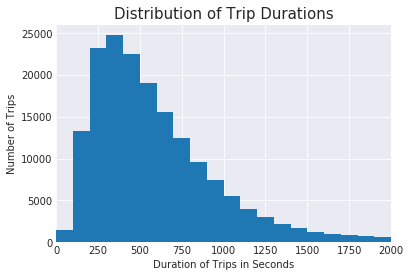

In [12]:
# I will start by using standard scaled plots of histogram
bins = np.arange(0, fordgobike_clean['duration_sec'].max() + 100, 100)
plt.hist(data = fordgobike_clean, x = 'duration_sec', bins = bins);

plt.title('Distribution of Trip Durations', fontsize = 15);
plt.xlabel('Duration of Trips in Seconds');
plt.ylabel('Number of Trips');
plt.xlim(0, 2000);

The distribution of trip durations is right skewed. Most trips have durations below 2000 seconds. I set x-axis limit to 2000 so that the spread can be more conspicuous. The mode of the distribution is around 400 seconds.

**What is the distribution of trips based on hour and day?**

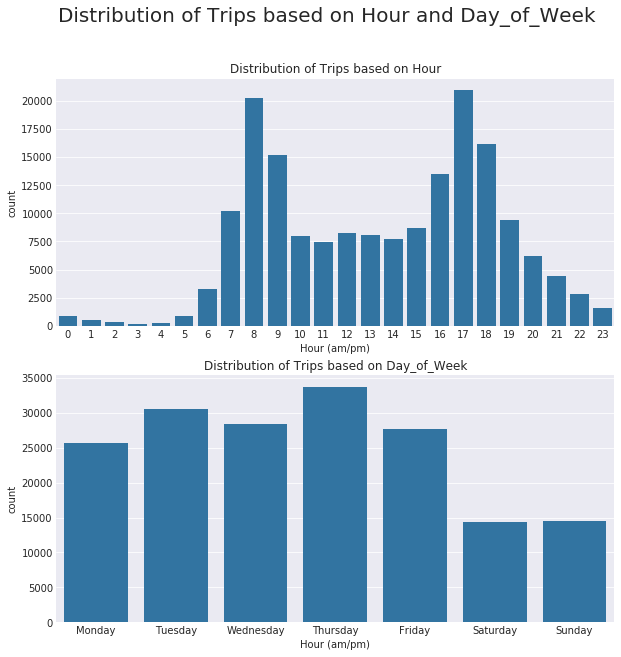

In [13]:
# Use standard scaled plots of histogram in a subplot function to show trip distribtion
# based on hour and day_of_week
fig = plt.figure(figsize = [10, 10])
color = sb.color_palette()[0]

plt.subplot(2, 1, 1)
sb.countplot(data = fordgobike_clean, x = 'hour', color = color)
plt.title('Distribution of Trips based on Hour')
plt.xlabel('Hour (am/pm)');

plt.subplot(2, 1, 2)
sb.countplot(data = fordgobike_clean, x = 'day_of_week', color = color)
plt.title('Distribution of Trips based on Day_of_Week')
plt.xlabel('Hour (am/pm)');

fig.suptitle('Distribution of Trips based on Hour and Day_of_Week', fontsize = 20);

The most common hour is 17 (5pm evening), then 8am morning. In general, the peak areas are either in the morning or evening. This can be explained with work lifestyle _-setting out in the morning and returning in the evening_. Midnights (0, 1, 2, 3, 4, 5) have least trip counts as expected. Thursday is the most popular day of travel, then Tuesday. Weekends have the least trip counts as expected, because people tend to stay indoor on weekends. February is the only month in the start_time column, hence, it won't be useful for further analysis.

**What is the most frequent start station and end station?**

In [14]:
# check the total number of unique stations in the dataset
fordgobike_clean['start_station_name'].nunique()

329

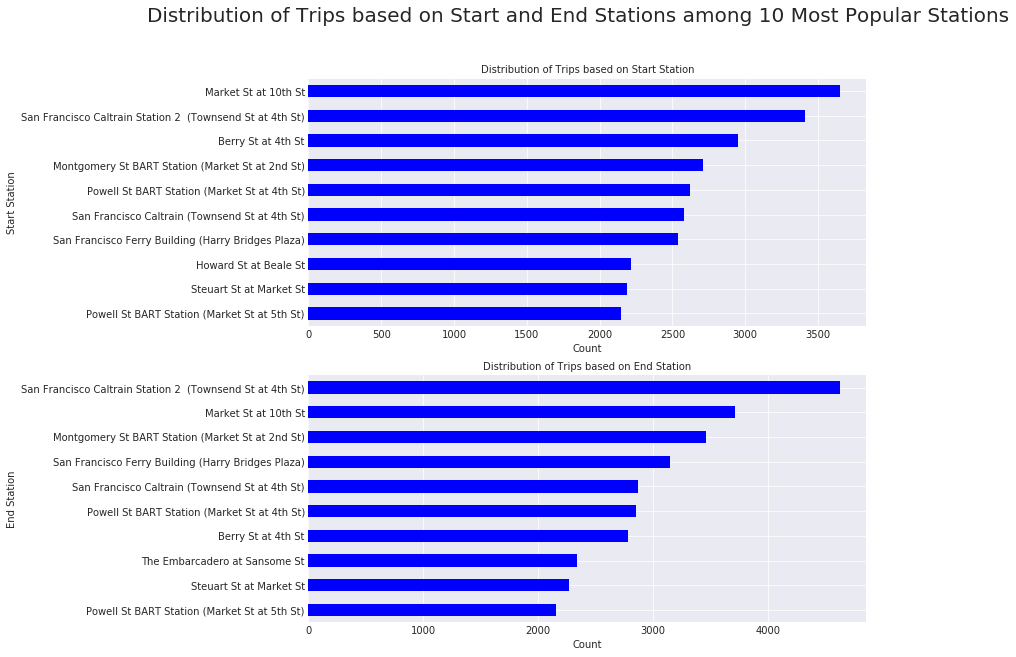

In [15]:
# Use standard scaled plots of bar chart in a subplot function to show trip distribtion
# based on start and end stations
fig = plt.figure(figsize = [10, 10])

plt.subplot(2, 1, 1)
fordgobike_clean.start_station_name.value_counts(ascending=True).tail(10).plot.barh(color = 'blue')
plt.title('Distribution of Trips based on Start Station', fontsize=10)
plt.ylabel('Start Station')
plt.xlabel('Count');

plt.subplot(2, 1, 2)
fordgobike_clean.end_station_name.value_counts(ascending=True).tail(10).plot.barh(color = 'blue')
plt.title('Distribution of Trips based on End Station', fontsize=10)
plt.ylabel('End Station')
plt.xlabel('Count');

fig.suptitle('Distribution of Trips based on Start and End Stations among 10 Most Popular Stations', fontsize = 20);

Because there are 329 unique stations in the dataset, plotting all stations make the chart fussy. I narrow it down to the 10 most popular stations. Stations in San Francisco appear to be most common for start and end stations, being in the city. Also, after checking the visualization below, most stations in San Francisco connect to public transportations such as Caltrain, Bart and Ferry. The Embarcadero at Sansome St is very close to Ferry building and located in financial district. Market St at 10th St and Berry St at 4th St are also close to Bart station. The proximities explain the connections and shared popularity.

**What is the most frequent combination of start and end station?**

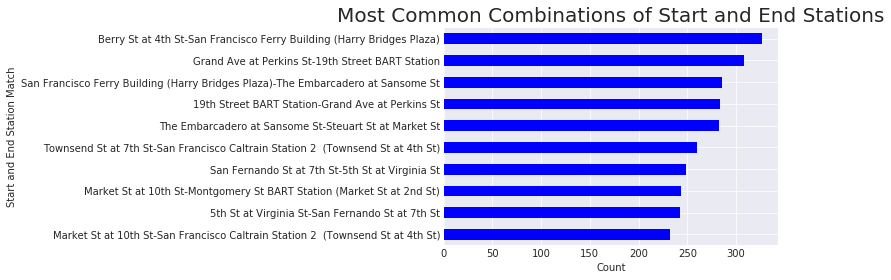

In [16]:
# create a new column to concatenate both start and end stations
# use standard scaled plot of bar chart to show the most common combinations of start and end stations
fordgobike_clean['start_to_end'] = fordgobike_clean['start_station_name'].str.cat(fordgobike_clean['end_station_name'], sep = '-')

fordgobike_clean['start_to_end'].value_counts(ascending=True).tail(10).plot.barh(color = 'blue')
plt.title('Most Common Combinations of Start and End Stations', fontsize=20)
plt.ylabel('Start and End Station Match')
plt.xlabel('Count');

Most stations in San Francisco connect to public transportations such as Caltrain, Bart and Ferry. The Embarcadero at Sansome St is very close to Ferry building and located in financial district. Market St at 10th St and Berry St at 4th St are also close to Bart station. The proximities explain their connections and shared popularity.

**What is the gender distribution among travellers?**

In [17]:
# Define a function that changes the count plot numbers into percentages relative frequencies
def percentage_plotter(plot, feature):
    """
    Arguments: This function takes in the initial plot and feature -the column of interest- as arguments.
    Operation: It uses the ratio of height of each bar to the total length of the feature to generate a percentage
    Return: This function then returns the annotated bar plot of the percentages
    """
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 10, va='bottom', ha='center')
    # Increase data to ink ratio by removing chart junks which are unnecessary features
    plot.spines['top'].set_visible(False)
    plot.spines['right'].set_visible(False)
    plot.spines['left'].set_visible(False)
    plt.yticks([])
    plt.ylabel('Percentage Relative Frequency (%)')

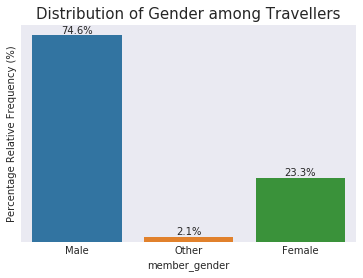

In [18]:
# Use the percentage plotter to plot bar chart showing distribution of gender
plot = sb.countplot(data=fordgobike_clean, x='member_gender')
percentage_plotter(plot, fordgobike_clean['member_gender'])
plt.title('Distribution of Gender among Travellers', fontsize=15);

Male has the largest percentage relative frequency of 74.6%, as opposed to 23.3% for Female. This means Male riders are more common. Other represents 2.1% of the population, which is very negligible.

**What is the distribution of user type?**

Text(0.5,1,'Distribution of User Type')

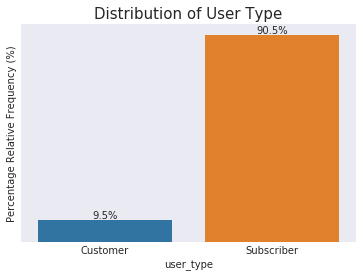

In [19]:
# Use the percentage plotter to plot bar chart showing distribution of user types
plot = sb.countplot(data=fordgobike_clean, x='user_type')
percentage_plotter(plot, fordgobike_clean['user_type'])
plt.title('Distribution of User Type', fontsize=15)

The subscribers represents a whopping 90.5% of user type, as opposed to 9.5% for customer. This means that subscribers are repeating users. Subscription tends to make customers repeat users. There might also be other benefits like low price associated with subscription.

**What proportion of riders uses bikeshare for all trips?**

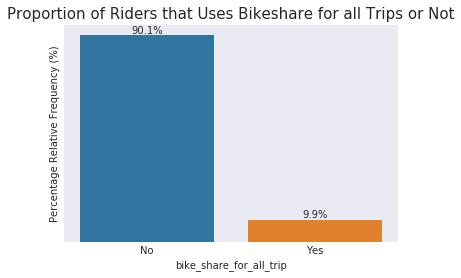

In [20]:
# Use the percentage plotter to plot bar chart showing proportion of riders that uses bikeshare for all trips or not
plot = sb.countplot(data=fordgobike_clean, x='bike_share_for_all_trip')
percentage_plotter(plot, fordgobike_clean['bike_share_for_all_trip'])
plt.title('Proportion of Riders that Uses Bikeshare for all Trips or Not', fontsize=15);

Amazingly, just 9.9% of riders uses bikeshare for all trips. Understandably, people use private vehicles and also enter public transports as alternative means of transportation.

**What is the age distribution of travellers?**

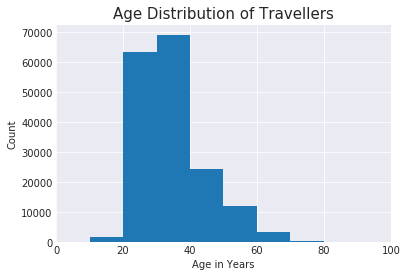

In [21]:
bins = np.arange(0, fordgobike_clean['age'].max() + 10, 10)
plt.hist(data = fordgobike_clean, x = 'age', bins = bins);

plt.title('Age Distribution of Travellers', fontsize = 15)
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.xlim(0, 100);

Most riders are within the age of 20 and 40 years. This is as expected due to their physical capacity. The least riders are below 20 or above 60 years as expected. Riders above 60 seems inpractical while riders above 80 represents outliers. Ages above 100 reasonably represent incorrect data. I will remove these outliers. In addition, there were some null values in the member_birth_year column that were removed.

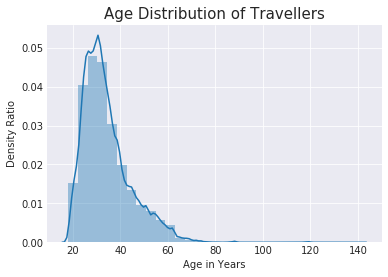

In [22]:
sb.distplot(fordgobike_clean['age'], bins=30, kde=True)
plt.title('Age Distribution of Travellers', fontsize = 15);
plt.xlabel('Age in Years');
plt.ylabel('Density Ratio');

Most riders are within the age of 20 and 40 years. This is as expected due to their physical capacity. The least riders are below 20 or above 60 years as expected. Riders above 60 seems inpractical while riders above 80 represents outliers. Ages above 100 reasonably represent incorrect data. I will remove these outliers. In addition, there are some null values in the member_birth_year column that were removed.

I will now remove rows with outliers in the age column. I will use 100 years as the cut-off point.

In [23]:
fordgobike_clean = fordgobike_clean.query('age < 100')

# test
fordgobike_clean['age'].max()

99

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of trip durations is right skewed. Most trips have durations below 2000 seconds. I set x-axis limit to 2000 so the spread can be more conspicuous. The mode of the distribution is around 400 seconds. The age distribution of travellers is also right skewed. The age column contains outliers that were removed. No transformation was performed. The most common hour is 17 (5pm evening). In general, the peak areas are either in the morning or evening. Thursday is the most popular day of travel. Stations in San Francisco appear to be most common for start and end stations, being in the city

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the age variable, a range of outliers were identified. These outliers can be explained by inconsistencies in data collection. To avoid data distortion when doing further analysis, all of these outliers were removed from the dataset. I created the age, day_of_week, hour of day, day part columns to facilitate my analysis. I also changed the age datatype from float to integer to be consistent with real age, start_time datatype from string to datetime object datatype to enable extraction of hour, day, month and year. I made the day_of_week, day_part into categorical datatypes to make their analysis flexible with more properties. I then removed all unnecessary columns from the dataset. Finally, I removed all null values from the dataset.

## Bivariate Exploration


**How does the user type affects trip duration?**

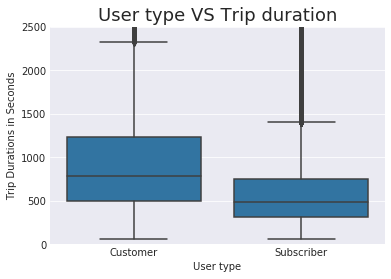

In [24]:
# Use a boxplot to explore relationship between user type and trip duration
base_color = sb.color_palette()[0]
sb.boxplot(data = fordgobike_clean, x = 'user_type', y = 'duration_sec', color = base_color);
plt.ylim(0, 2500);
plt.title('User type VS Trip duration', fontsize = 18);
plt.xlabel('User type');
plt.ylabel('Trip Durations in Seconds');

All trip durations for customers are greater than the median trip duration for a suscriber. This is unexpected because I expected that the trip durations for subscribers, like trip frequencies, will be higher for subscribers. An explanation for this might be that subscribers take rides for their routine short travels. On the other hand, customers take rides seldomly to travel long distances. Very likely, most of these customers are tourists.

**How does the day_of_week affects trip durations?**

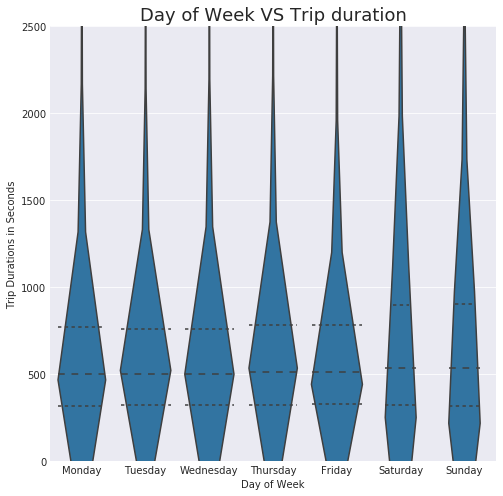

In [25]:
# Use a violin plot to explore the relationship between day of week and trip durations
plt.figure(figsize = (8, 8))
base_color = sb.color_palette()[0]
sb.violinplot(x = fordgobike_clean['day_of_week'], y = fordgobike_clean['duration_sec'], inner='quartile', color=base_color)
plt.ylim(0, 2500);
plt.title('Day of Week VS Trip duration', fontsize = 18);
plt.xlabel('Day of Week');
plt.ylabel('Trip Durations in Seconds'); 

The trip duration statistics are somewhat thesame for monday to friday -approximately equal median and quartiles. On the other hand, as previously seen, trip frequencies are reduced on weekends. However, trip durations tend to be slightly greater for weekend trips.

**How does the hour of day affects trip durations?**

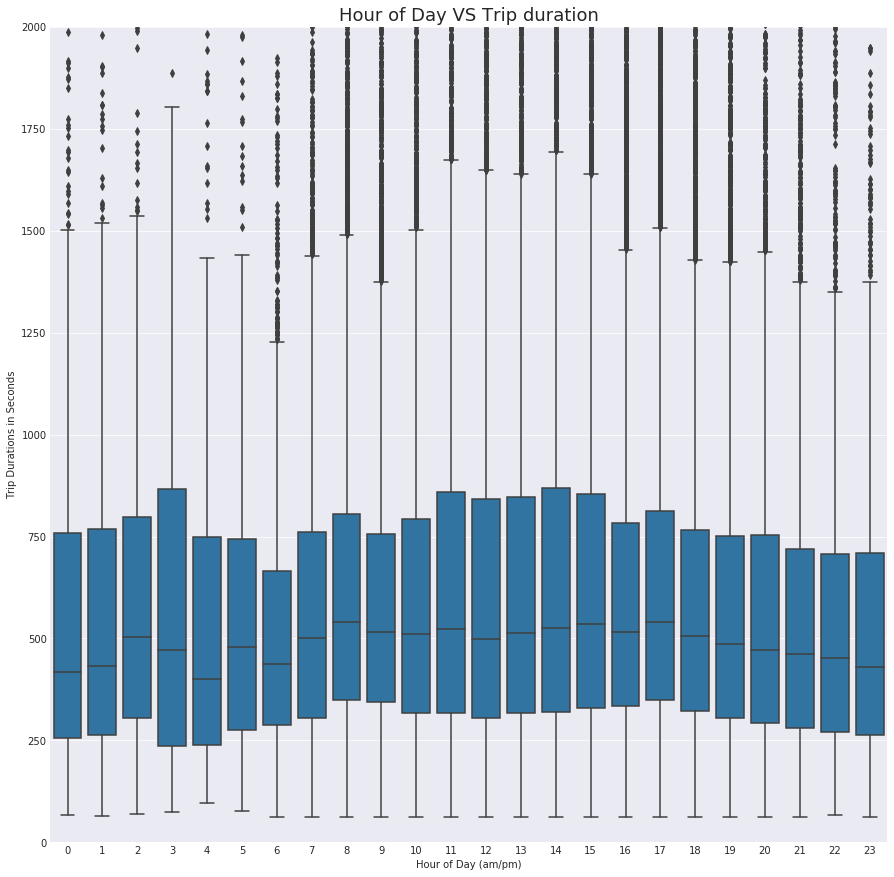

In [26]:
# Use box plot to explore the relationship between hour of day and trip durations
plt.figure(figsize = (15, 15))
base_color = sb.color_palette()[0]
sb.boxplot(x = fordgobike_clean['hour'], y = fordgobike_clean['duration_sec'], color=base_color)
plt.ylim(0, 2000)
plt.title('Hour of Day VS Trip duration', fontsize = 18);
plt.xlabel('Hour of Day (am/pm)');
plt.ylabel('Trip Durations in Seconds'); 

From the plot above, the trip durations vary greatly across the hours of the day. But the hours between 11 am and 3 pm all have higher trip durations. Let's categorise these hours according to the day part in the plot below.

**How does trip durations vary with day part?**

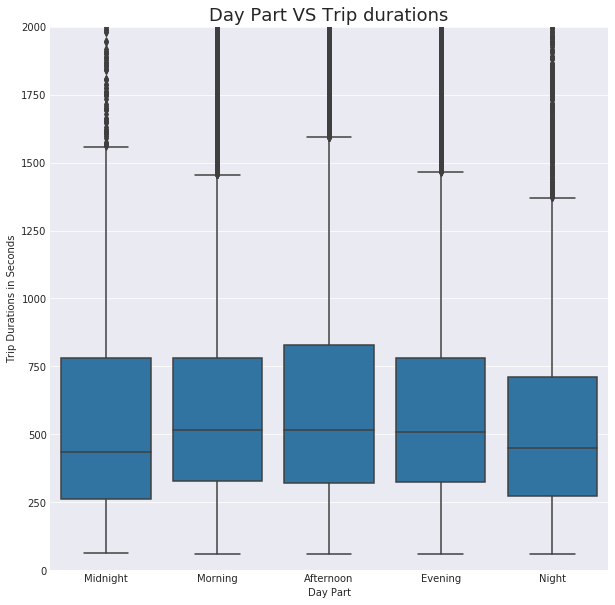

In [27]:
# Use box plot to explore the relationship between day part and trip durations
plt.figure(figsize = (10, 10))
base_color = sb.color_palette()[0]
sb.boxplot(x = fordgobike_clean['day_part'], y = fordgobike_clean['duration_sec'], color=base_color)
plt.ylim(0, 2000)
plt.title('Day Part VS Trip durations', fontsize = 18);
plt.xlabel('Day Part')
plt.ylabel('Trip Durations in Seconds'); 

From the plot above, morning, afternoon and evening periods have thesame median trip durations. Meanwhile, afternoon period has some larger trip durations. On the other hand, night and midnight periods have least median trip durations, in decreasing order.

**How does the age of traveller affects the trip duration?**

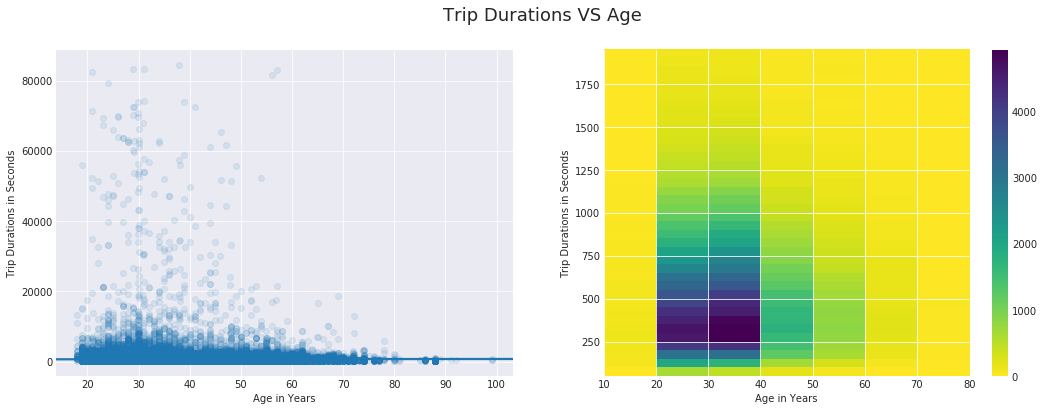

In [28]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fordgobike_clean, x = 'age', y = 'duration_sec', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=True)
plt.xlabel('Age in Years')
plt.ylabel('Trip Durations in Seconds');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
bins_x = np.arange(10, 80+10, 10)
bins_y = np.arange(50, fordgobike_clean['duration_sec'].quantile(0.97)+50, 50)
plt.hist2d(data = fordgobike_clean, x = 'age', y = 'duration_sec', bins = [bins_x, bins_y], cmap='viridis_r')
plt.colorbar()
plt.xlabel('Age in Years')
plt.ylabel('Trip Durations in Seconds');
plt.suptitle('Trip Durations VS Age', fontsize = 18);

The largest trip durations are within ages 20 to 40 years. It is also evident from the heatmap that a larger percentage of trips are by riders aged 20 to 40 years, and some between 40 and 60 years.

**What is the distribution of trips based on hour and gender?**

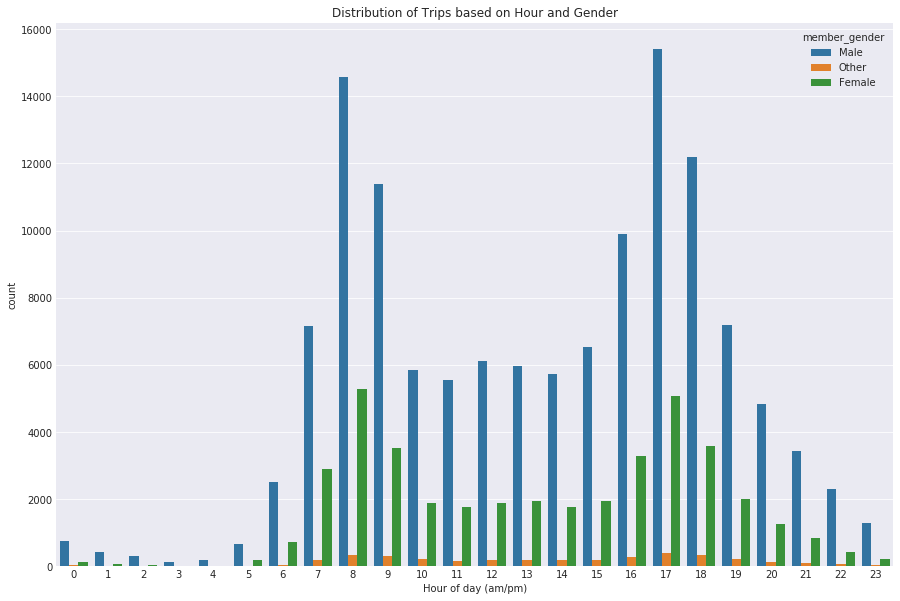

In [29]:
plt.figure(figsize = [15, 10])
sb.countplot(data = fordgobike_clean, x = 'hour', hue='member_gender')
plt.title('Distribution of Trips based on Hour and Gender');
plt.xlabel('Hour of day (am/pm)');

With a ratio of 74.6:23.3:2.1 for male, female, other travel frequencies respectively, it is not shocking that male has the highest trip counts for all hours of the day

**What is the distribution of trips based on day of week and gender?**

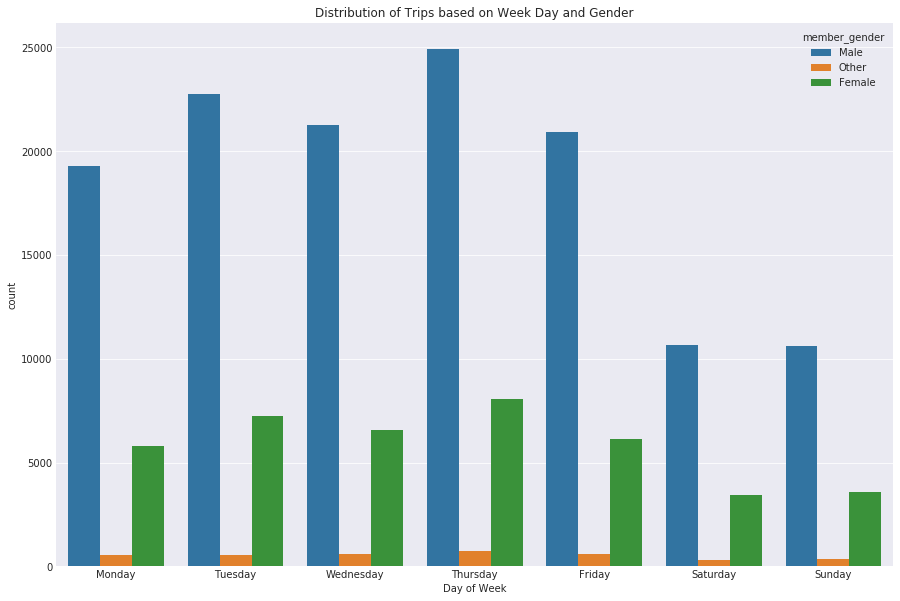

In [30]:
plt.figure(figsize = [15, 10])
sb.countplot(data = fordgobike_clean, x = 'day_of_week', hue = 'member_gender')
plt.title('Distribution of Trips based on Week Day and Gender');
plt.xlabel('Day of Week');

With a ratio of 74.6:23.3:2.1 for male, female, other travel frequencies respectively, it is not shocking that male has the highest trip counts for all days of the week

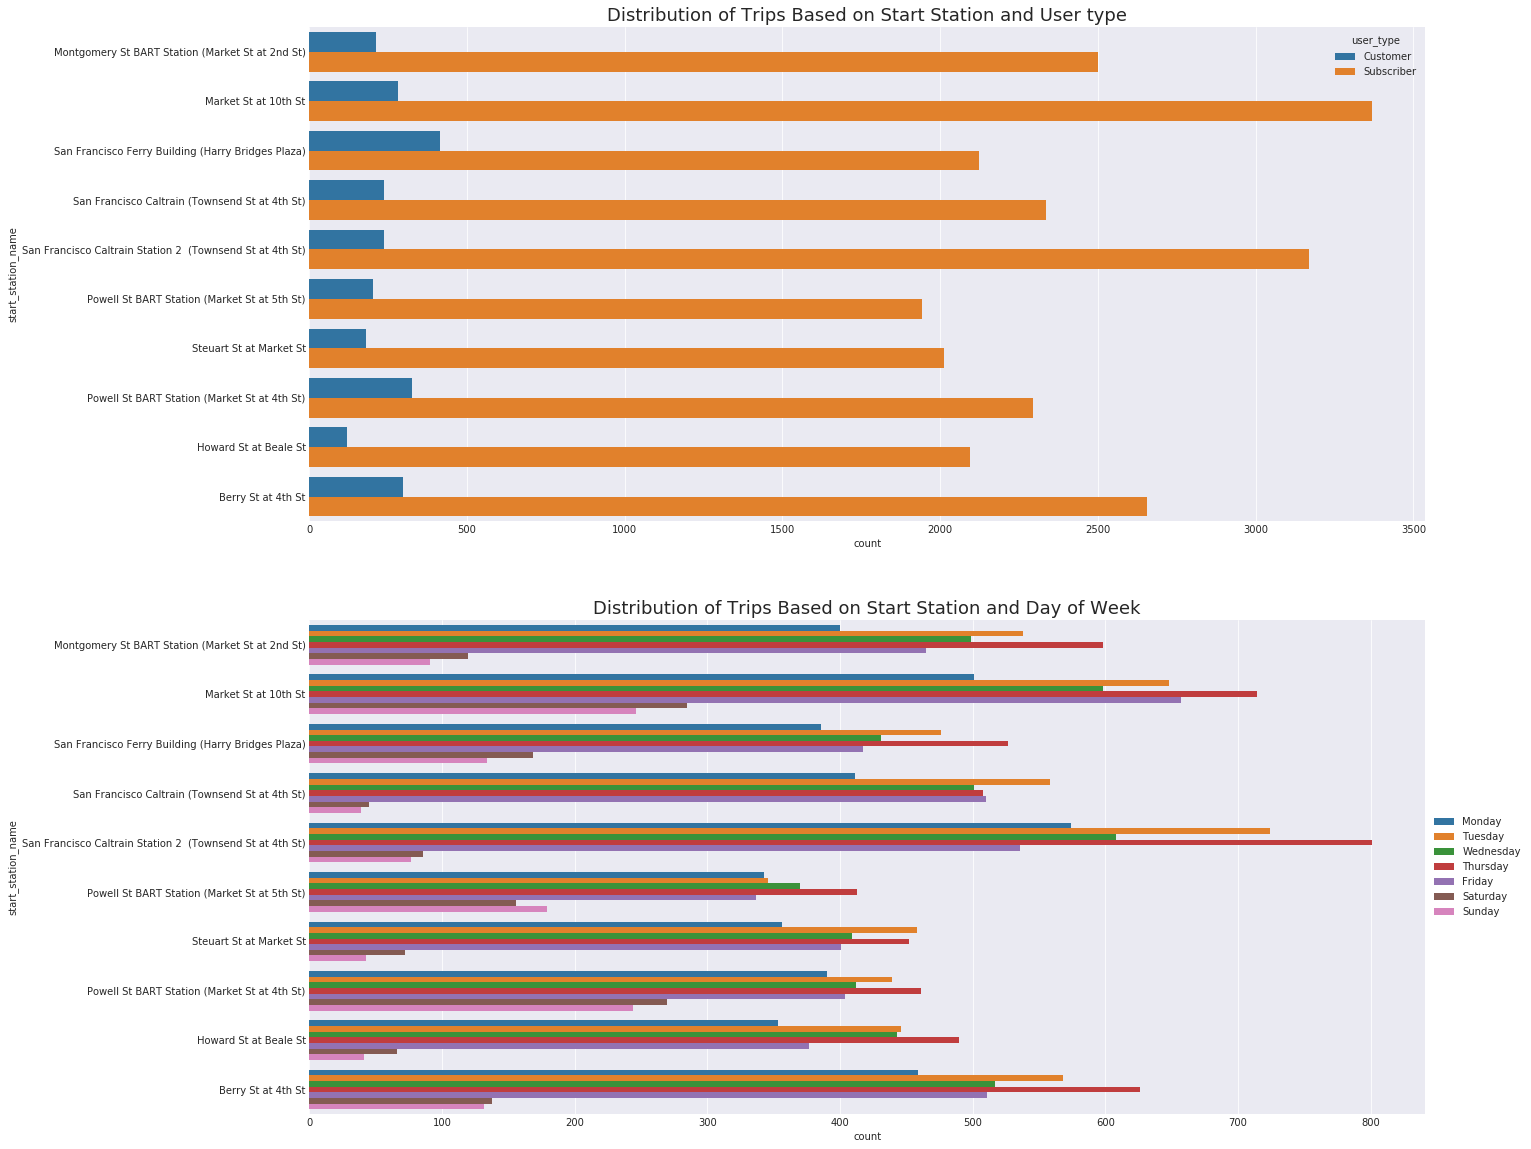

In [31]:
# Use standard scaled plots of bar chart in a subplot function to show trip distribtion 
# based on start and end stations, user type and day of week
fig = plt.figure(figsize = [20, 20])

plt.subplot(2, 1, 1)
# create a list of 10 most popular start stations
top10_start = list(fordgobike_clean.start_station_name.value_counts(ascending=False).head(10).index)
# create a dataframe of 10 most popular start stations
df_top10_start = fordgobike_clean.loc[fordgobike_clean['start_station_name'].isin(top10_start)]

sb.countplot(data = df_top10_start, y = 'start_station_name', hue='user_type')
plt.title('Distribution of Trips Based on Start Station and User type', fontsize=18);

plt.subplot(2, 1, 2)
sb.countplot(data = df_top10_start, y = 'start_station_name', hue='day_of_week')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Distribution of Trips Based on Start Station and Day of Week', fontsize=18);

From the 1st plot, mostly all trips are by subscribers in all of the top 10 most popular stations, very few trips are by customers. From the 2nd plot, Thursday -the most popular day of travel- appear to be the most popular day of travel in all of the top 10 most popular start stations, except in Caltrain and Market St. where Tuesday was most popular. Although, very slightly at Market St.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Hour of day and day of week have great effects on travel frequencies. The hour of 5 pm and also weekdays -not weekends- have higher travel frequencies. The trip duration is not affected by gender. The sccatter plot suggested there is a very weak linear relationship between age and travel frequencies. More trip frequencies were observed between ages 20 and 40 years. The male gender seems to have higher travel frequencies, irrespective of the week day.

The stations in San Francisco dominated the top 10 most popular stations among start and end stations.

Interestingly, the plot suggested that customers travel higher trip durations compared to subscribers. A plausible explanation for this might be that subscribers take rides for their routine short travels. On the other hand, customers take rides seldomly to travel long distances.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No relationship was observed between the other features.

## Multivariate Exploration


**How does the trip durations compare with gender across different ages?**

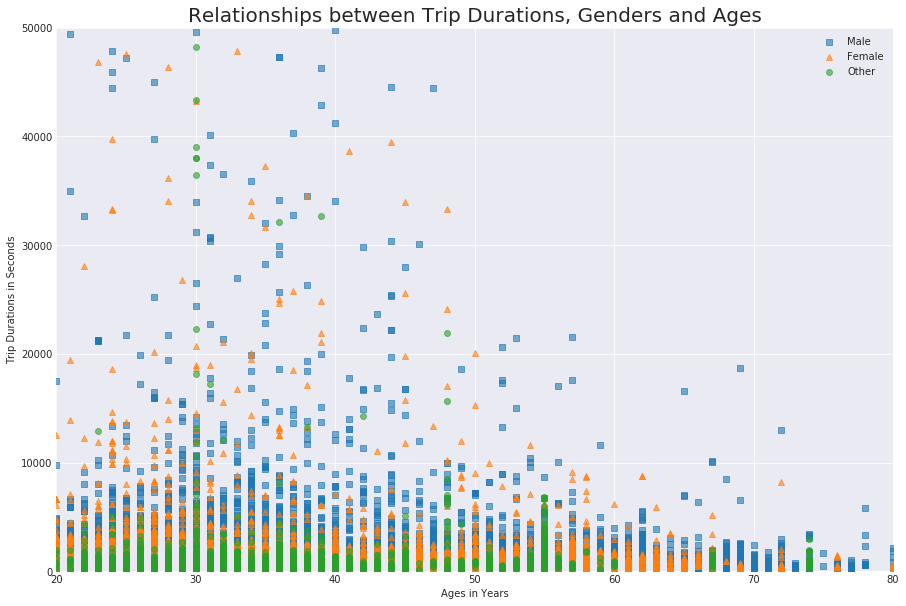

In [32]:
# use a single scatter plot to show relationship between trip durations, genders and ages
plt.figure(figsize = (15,10))

# create a list of lists of gender and markers
gender_markers = [['Male', 's'],
               ['Female', '^'],
               ['Other', 'o']]
# use a for-loop to map marker to each gender in the dataset
for gender, marker in gender_markers:
    df_gender = fordgobike_clean[fordgobike_clean['member_gender'] == gender]
    plt.scatter(data = df_gender, x = 'age', y = 'duration_sec', marker = marker, alpha = 6/10);
plt.legend(['Male', 'Female', 'Other']);
# To avoid a clumsy chart and make the distribution more visible, set both x and y limits
plt.xlim(20, 80);
plt.ylim(0, 50000);
plt.title('Relationships between Trip Durations, Genders and Ages', fontsize = 20);
plt.xlabel('Ages in Years');
plt.ylabel('Trip Durations in Seconds');

From the visualization above, there doesn't seem to be a strong indication that one gender necessarily rides longer than the other. The data shows that people who specified their gender as "Female" or "Other" tend to ride just as long as those who specified their gender as "Male" as all the data points are interspersed. The tail in age axis is unsurprising, as we have already seen in the age distribution.

**How does the user type affects trip duration across the week days?**

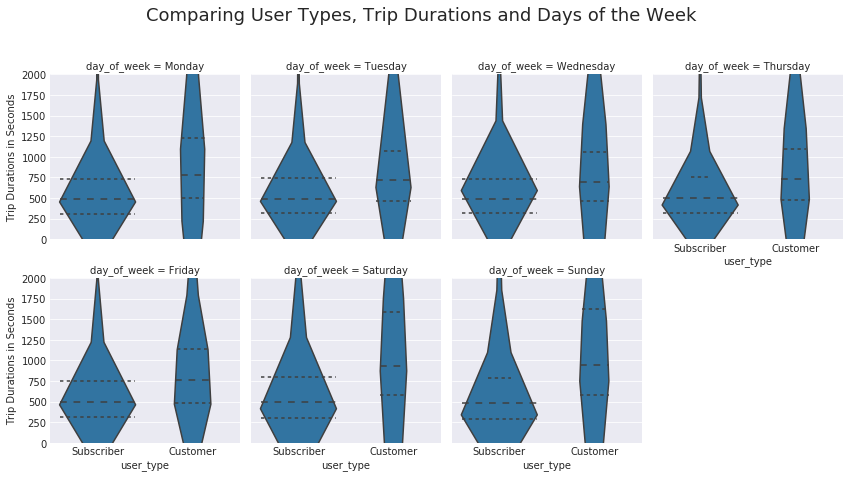

In [33]:
base_color = sb.color_palette()[0]
order = ['Subscriber', 'Customer']
g = sb.FacetGrid(data=fordgobike_clean, col='day_of_week', col_wrap=4)
g.fig.suptitle('Comparing User Types, Trip Durations and Days of the Week', y=1.1, fontsize=18)
g.map(sb.violinplot,'user_type', 'duration_sec', order = order, inner='quartile', color=base_color)
plt.ylim(0, 2000);
g.set_ylabels('Trip Durations in Seconds');

Unsurprisingly, customers have higher trip durations but lower trip frequencies on all days of the week.

**How does the day_of_week affects trip durations and frequencies across genders?**

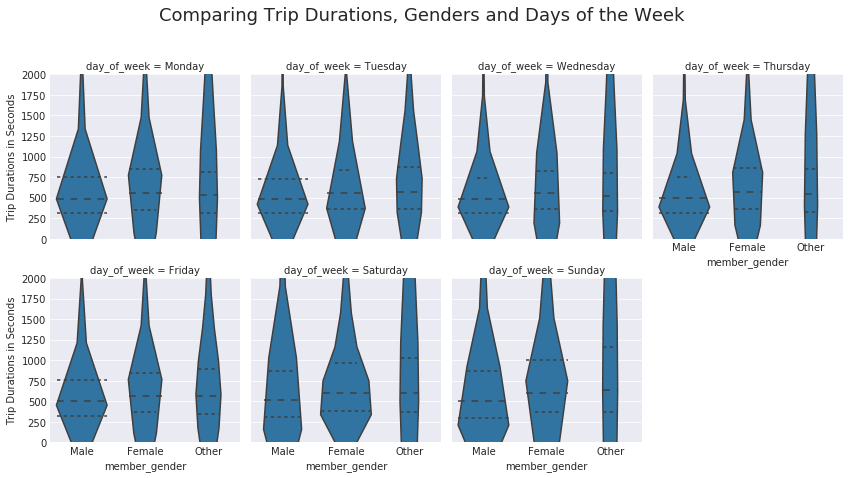

In [34]:
base_color = sb.color_palette()[0]
order = ['Male', 'Female', 'Other']
g = sb.FacetGrid(data=fordgobike_clean, col='day_of_week', col_wrap=4)
g.fig.suptitle('Comparing Trip Durations, Genders and Days of the Week', y=1.1, fontsize=18)
g.map(sb.violinplot,'member_gender', 'duration_sec', order = order, inner='quartile', color=base_color)
plt.ylim(0, 2000);
g.set_ylabels('Trip Durations in Seconds');

The trip duration is not really affected, neither by gender nor by day of the week. However, female riders seem to have more trip frequencies on Saturday.

**How does the day part affects trip durations across genders?**

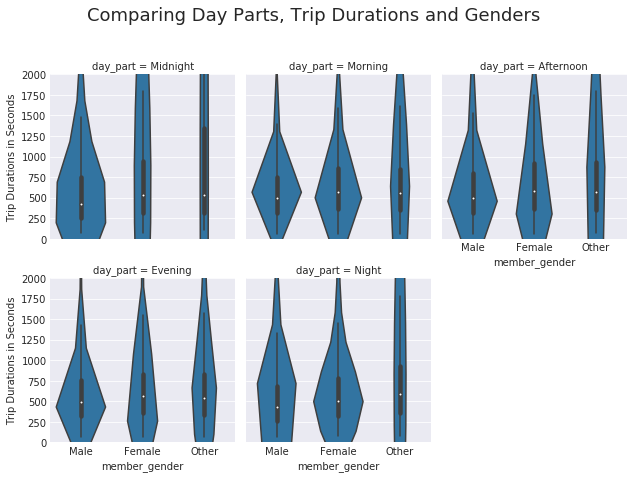

In [35]:
base_color = sb.color_palette()[0]
order = ['Male', 'Female', 'Other']
g = sb.FacetGrid(data=fordgobike_clean, col='day_part', col_wrap=3)
g.fig.suptitle('Comparing Day Parts, Trip Durations and Genders', y=1.1, fontsize=18)
g.map(sb.violinplot,'member_gender', 'duration_sec', order = order, color=base_color)
plt.ylim(0, 2000);
g.set_ylabels('Trip Durations in Seconds');

The median is approximately equal across all subplots. Trip duration is not necessarily affected by gender across all day parts. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There doesn't seem to be a strong indication that one gender necessarily rides longer than the other. The data shows that people who specified their gender as "Female" or "Other" tend to ride just as long as those who specified their gender as "Male" as all the data points are interspersed. The long tail in age axis is unsurprising, as we have already seen in the age distribution. Unsurprisingly, customers have higher trip durations but lower trip frequencies on all days of the week. The median is approximately equal across all subplots. Trip duration is not necessarily affected by gender across all day parts.

The trip duration is not really affected, neither by gender nor by day of the week. However, female riders seem to have more trip frequencies on Saturday.

### Were there any interesting or surprising interactions between features?

There seems to be no surprising interactions between features.

## Conclusions

The summary effects of features on trip durations and frequencies are as follows:

Time:
Morning and evening have the most trips. Trip duration is not necessarily affected by time of day.

Day of Week:
There are more trips during the weekdays than in weekends. Trip duration is not necessarily affected by day of week.

Station Locations:
Looking at the top 10 most popular stations, there are more trips during the weekdays than in weekends. Thursday is the most popular day in these stations except in Caltrain and Market St. where Tuesday is most popular. Stations in San Francisco dominate the list of top 10. More visits to the tourist attractions at Ferry Building and Embarcadero might be responsible for this.

Age:
Most of age population falls between 20 and 40 years old. It might imply they are full time employees and commuters.

Gender:
The number of trips in males is way more than the number in females. It needs to be investigated more. Trip duration is not necessarily affected by gender.

User Type:
The number of trips in subscribers is more than the number in customers because of pricing and population.
